In [1]:
import os
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg
from os import path
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")
import anndata as ad
%load_ext autoreload
%autoreload 2
%matplotlib inline

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10
squidpy==1.2.3


In [2]:
section_id ='151669'    
input_dir = os.path.join('/mnt/disk1/xzhou/data/spatial_3D/DLPFC/', section_id)
adata_st = sc.read_visium(path=input_dir, count_file=section_id + '_filtered_feature_bc_matrix.h5', load_images=True)
adata_st.var_names_make_unique(join="++")

# read the annotation
Ann_df = pd.read_csv(os.path.join(input_dir, section_id + '_truth.txt'), sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']
Ann_df[Ann_df.isna()] = "unknown"
adata_st.obs['Ground Truth'] = Ann_df.loc[adata_st.obs_names, 'Ground Truth'].astype('category') 

#'Ground Truth' 是原始列名，你需要将其改为 'cell_type'
adata_st.obs.rename(columns={'Ground Truth': 'cell_type'}, inplace=True)

In [3]:
ad_sp = adata_st.copy()
ad_sp

AnnData object with n_obs × n_vars = 3661 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
ad_sc = ad.read_h5ad("/mnt/disk1/xiaojk/data/DLPFC/Velmeshev_2019_rna.h5ad")

In [5]:
ad_sc

AnnData object with n_obs × n_vars = 30147 × 65217
    obs: 'cell_type'
    var: 'gene_ids'

In [6]:
np.unique(ad_sc.X.toarray()[0, :])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 11., 85.],
      dtype=float32)

In [7]:
sc.pp.normalize_total(ad_sc)

In [8]:
ad_sc.obs['subclass_label'] = ad_sc.obs.cell_type

In [9]:
ad_sc.obs.cell_type.value_counts()

cell_type
Oligodendrocytes    5892
L2/3                3701
OPC                 2954
L4                  2245
Neu-NRGN-II         2066
AST-PP              1836
IN-SST              1414
IN-VIP              1357
Microglia           1320
L5/6-CC             1253
IN-PV               1123
AST-FB              1106
L5/6                 996
Neu-mat              963
Neu-NRGN-I           799
Endothelial          680
IN-SV2C              442
Name: count, dtype: int64

In [10]:
ad_sp.obs.cell_type.value_counts()

cell_type
Layer_3    2141
Layer_5     510
Layer_6     391
Layer_4     364
WM          230
unknown      25
Name: count, dtype: int64

In [11]:
sc.tl.rank_genes_groups(ad_sc, groupby="subclass_label", use_raw=False)
markers_df = pd.DataFrame(ad_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers = list(np.unique(markers_df.melt().value.values))
len(markers)

994

In [12]:
markers

['A2M',
 'AAK1',
 'ABCA2',
 'ABCA8',
 'ABCB1',
 'ABCC4',
 'ABCG2',
 'ABHD2',
 'ABLIM1',
 'ABR',
 'AC010127.3',
 'AC011288.2',
 'AC074363.1',
 'AC114765.1',
 'AC159540.1',
 'ACOT11',
 'ACSBG1',
 'ACSS1',
 'ACTB',
 'ADAM28',
 'ADAMTS6',
 'ADAMTS9-AS2',
 'ADARB2',
 'ADCY2',
 'ADRBK2',
 'AFF3',
 'AGAP1',
 'AGBL4',
 'AGT',
 'AHCYL2',
 'AHI1',
 'AKAP13',
 'ALDH1A1',
 'ALDOA',
 'ALK',
 'ANK1',
 'ANK3',
 'ANKRD30BL',
 'ANKRD36C',
 'ANKRD44',
 'ANKRD55',
 'ANKS1B',
 'ANO2',
 'ANO4',
 'AOAH',
 'APBB1IP',
 'APC',
 'APLP1',
 'APOE',
 'APP',
 'AQP4',
 'ARAP2',
 'ARHGAP15',
 'ARHGAP22',
 'ARHGAP24',
 'ARHGAP29',
 'ARHGAP44',
 'ARL4C',
 'ARPP19',
 'ARPP21',
 'ASIC2',
 'ASTN2',
 'ATM',
 'ATP10A',
 'ATP1A1',
 'ATP1A2',
 'ATP1A3',
 'ATP1B1',
 'ATP1B2',
 'ATP2A2',
 'ATP2B1',
 'ATP6AP2',
 'ATP6V0B',
 'ATP8A1',
 'ATP8A2',
 'ATP8B4',
 'ATRNL1',
 'AUTS2',
 'B2M',
 'BACH1',
 'BAI3',
 'BCAN',
 'BCAS1',
 'BCL11A',
 'BCL11B',
 'BEX1',
 'BEX2',
 'BLNK',
 'BMP2K',
 'BMPER',
 'BMPR1B',
 'BNC2',
 'BRINP3',
 'BSG',
 

In [13]:
tg.pp_adatas(ad_sc, ad_sp, genes=markers)

INFO:root:927 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:16525 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [14]:
assert ad_sc.uns['training_genes'] == ad_sp.uns['training_genes']

In [15]:
ad_map = tg.map_cells_to_space(ad_sc, ad_sp,
    mode="cells",
#     mode="clusters",
#     cluster_label='cell_subclass',  # .obs field w cell types
    density_prior='rna_count_based',
    num_epochs=500,
    device="cuda:1",
#     device='cpu',
)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 927 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.366, KL reg: 0.125
Score: 0.578, KL reg: 0.002
Score: 0.600, KL reg: 0.001
Score: 0.603, KL reg: 0.001
Score: 0.604, KL reg: 0.001


INFO:root:Saving results..


In [16]:
ad_map

AnnData object with n_obs × n_vars = 30147 × 3661
    obs: 'cell_type', 'subclass_label'
    var: 'in_tissue', 'array_row', 'array_col', 'cell_type', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

In [17]:
def construct_obs_plot(df_plot, adata, perc=0, suffix=None):
    # clip
    df_plot = df_plot.clip(df_plot.quantile(perc), df_plot.quantile(1 - perc), axis=1)

    # normalize
    df_plot = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

    if suffix:
        df_plot = df_plot.add_suffix(" ({})".format(suffix))
    adata.obs = pd.concat([adata.obs, df_plot], axis=1)
    
    
def plot_cell_annotation_sc(
    adata_sp, 
    annotation_list, 
    x="x", 
    y="y", 
    spot_size=None, 
    scale_factor=None, 
    perc=0,
    alpha_img=1.0,
    bw=False,
    ax=None
):
        
    # remove previous df_plot in obs
    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

    # construct df_plot
    df = adata_sp.obsm["tangram_ct_pred"][annotation_list]
    construct_obs_plot(df, adata_sp, perc=perc)
    
    #non visium data 
    if 'spatial' not in adata_sp.obsm.keys():
        #add spatial coordinates to obsm of spatial data 
        coords = [[x,y] for x,y in zip(adata_sp.obs[x].values,adata_sp.obs[y].values)]
        adata_sp.obsm['spatial'] = np.array(coords)
    
    if 'spatial' not in adata_sp.uns.keys() and spot_size == None and scale_factor == None:
        raise ValueError("Spot Size and Scale Factor cannot be None when ad_sp.uns['spatial'] does not exist")
    
    #REVIEW
    if 'spatial' in adata_sp.uns.keys() and spot_size != None and scale_factor != None:
        raise ValueError("Spot Size and Scale Factor should be None when ad_sp.uns['spatial'] exists")
    
    sc.pl.spatial(
        adata_sp, color=annotation_list, cmap="viridis", show=False, frameon=False, spot_size=spot_size,
        scale_factor=scale_factor, alpha_img=alpha_img, bw=bw, ax=ax, colorbar_loc=None,ncols=5,wspace=0
    )

    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


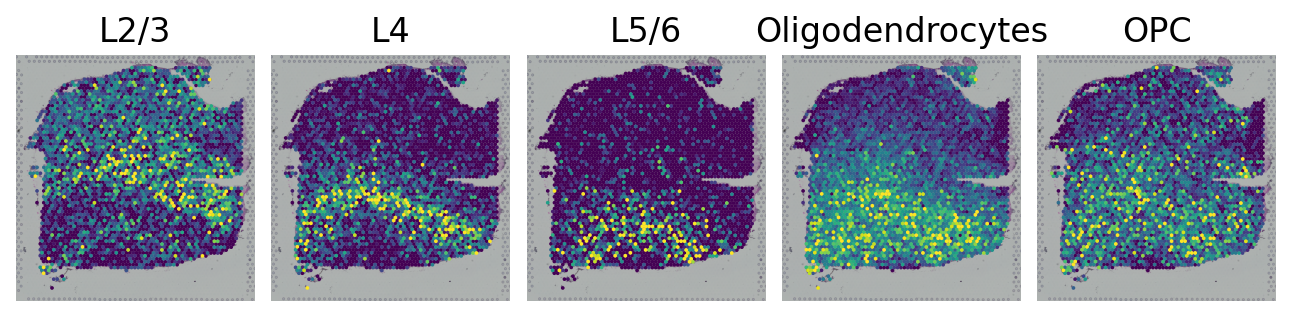

In [18]:
tg.project_cell_annotations(ad_map, ad_sp, annotation="cell_type")
annotation_list = list(ad_sc.obs.cell_type.unique())

sc.settings.set_figure_params(frameon=True, fontsize=15, facecolor='white', figsize=(2, 2)) #dpi=300, 
plot_cell_annotation_sc(ad_sp, ['L2/3', 'L4','L5/6', 'Oligodendrocytes','OPC'],perc=0.02, spot_size= 150)
# plot_cell_annotation_sc(ad_sp, annotation_list,perc=0.02, spot_size= 150)

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


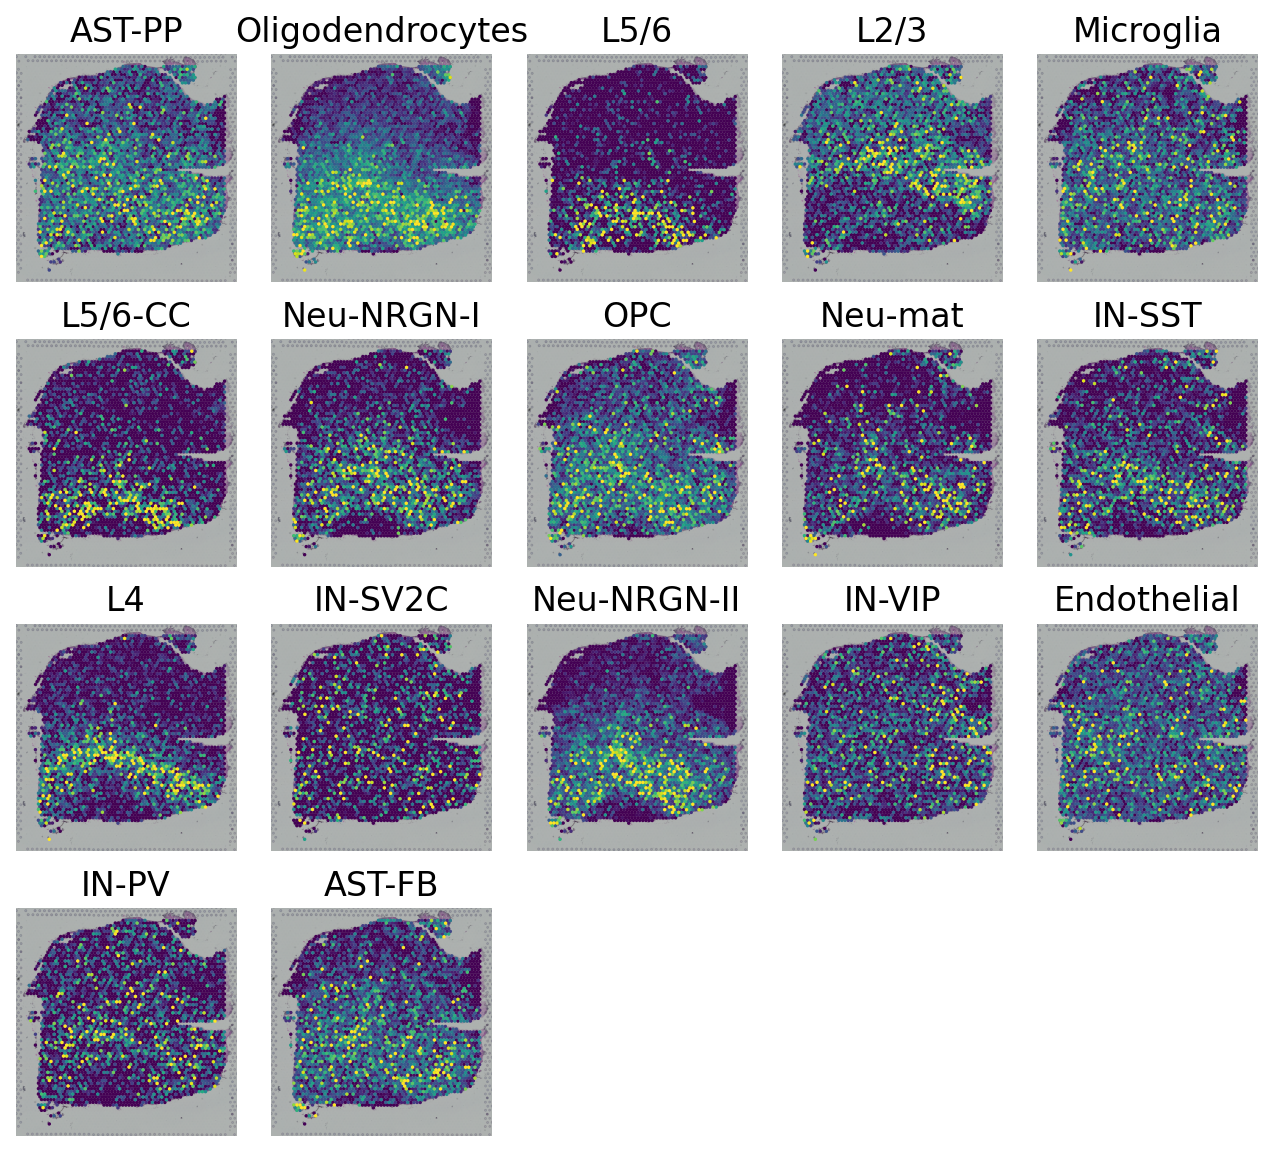

In [19]:
tg.project_cell_annotations(ad_map, ad_sp, annotation="cell_type")
annotation_list = list(ad_sc.obs.cell_type.unique())

sc.settings.set_figure_params(frameon=True, fontsize=15, facecolor='white', figsize=(2, 2)) #dpi=300, 
# plot_cell_annotation_sc(ad_sp, ['L2/3', 'L4', 'OPC', 'L5/6'],perc=0.02, spot_size= 150)
plot_cell_annotation_sc(ad_sp, annotation_list,perc=0.02, spot_size= 150)

In [20]:
ad_sp

AnnData object with n_obs × n_vars = 3661 × 21235
    obs: 'in_tissue', 'array_row', 'array_col', 'cell_type', 'uniform_density', 'rna_count_based_density'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'sparsity'
    uns: 'spatial', 'training_genes', 'overlap_genes'
    obsm: 'spatial', 'tangram_ct_pred'